In [1]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing import image

In [2]:


from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn.metrics import precision_score , recall_score ,classification_report, f1_score
from tensorflow.keras.preprocessing import image as preprocessing_image


import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
BASE_DIR = "E:/ourProject/newmodel/Dataset"

test_datagen= preprocessing_image.ImageDataGenerator(rescale=1/255)

test_set = test_datagen.flow_from_directory(os.path.join(BASE_DIR, "test"), target_size=(224,224), batch_size=128, class_mode='categorical', shuffle=False)




Found 3630 images belonging to 32 classes.


In [4]:
# classes = [train_generator.class_indices.keys()]
# y = validation_generator.labels
# len(y)
classes = list(test_set.class_indices.keys())
classes

['Animals',
 'Attintive',
 'Doctor',
 'brother',
 'builder',
 'cheap',
 'excellent',
 'friend',
 'good',
 'him',
 'how',
 'husband',
 'mechanic',
 'morning',
 'plane',
 'president',
 'satisfaction',
 'school',
 'seven',
 'six',
 'teacher',
 'translator',
 'vegetables',
 'very good',
 'wait',
 'wash',
 'watch maker',
 'what',
 'when',
 'who',
 'with_god_will',
 'yours']

In [5]:
from tensorflow.keras.optimizers import Adam


In [7]:
# Load the model architecture from the JSON file
model_architecture = open('ResNet152V2_model.json', 'r').read()
model2 = model_from_json(model_architecture)

original_learning_rate = 0.01  # Example value
optimizer = Adam(learning_rate=original_learning_rate)

model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Load the model's learned weights from the HDF5 file
model2.load_weights('image_classifier_ResNet152V2.h5')



In [8]:
y_pred=model2.predict(test_set)

29/29 [==============================] - 893s 31s/step


In [9]:
y_test=test_set.labels  

In [10]:
y_pred = tf.argmax(y_pred, axis=1)

In [11]:
print(y_test.shape)
print(y_pred.shape)

(3630,)
(3630,)


In [12]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

In [13]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

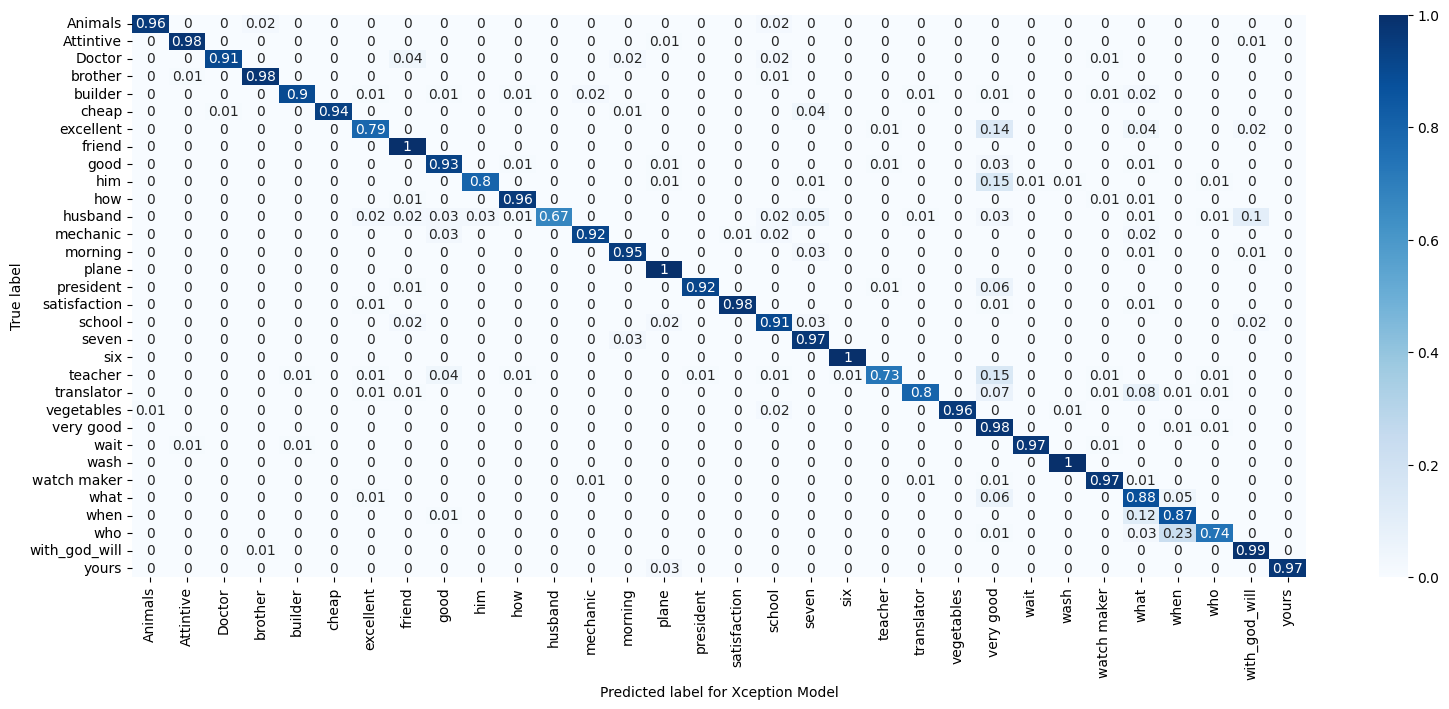

In [23]:

figure = plt.figure(figsize=(16, 7))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label for ResNet152V2 Model')
plt.show()

In [14]:
#  precision_score
print(precision_score(y_test, y_pred,average=None))

[1.         0.97222222 1.         1.         1.         1.
 1.         1.         1.         0.99056604 0.98837209 1.
 1.         1.         0.99056604 0.98130841 1.         0.99056604
 0.99056604 1.         0.98958333 0.91772152 1.         0.99459459
 1.         1.         0.96391753 0.92857143 0.912      0.95495495
 0.96511628 1.        ]


In [15]:
# recall_score
print(recall_score(y_test, y_pred,average=None))

[1.         1.         1.         0.98095238 0.99047619 1.
 0.94029851 1.         0.94067797 1.         1.         0.99056604
 0.95959596 0.99047619 1.         0.97222222 0.99236641 1.
 1.         1.         0.95959596 1.         1.         0.98395722
 1.         1.         1.         0.936      0.92682927 0.92982456
 1.         1.        ]


In [16]:
#  f1_score
print(f1_score(y_test, y_pred,average=None))

[1.         0.98591549 1.         0.99038462 0.99521531 1.
 0.96923077 1.         0.96943231 0.99526066 0.99415205 0.99526066
 0.97938144 0.99521531 0.99526066 0.97674419 0.99616858 0.99526066
 0.99526066 1.         0.97435897 0.95709571 1.         0.98924731
 1.         1.         0.9816273  0.93227092 0.91935484 0.94222222
 0.98224852 1.        ]


In [17]:
#  f1_score
print(f1_score(y_test, y_pred,average=None))

[1.         0.98591549 1.         0.99038462 0.99521531 1.
 0.96923077 1.         0.96943231 0.99526066 0.99415205 0.99526066
 0.97938144 0.99521531 0.99526066 0.97674419 0.99616858 0.99526066
 0.99526066 1.         0.97435897 0.95709571 1.         0.98924731
 1.         1.         0.9816273  0.93227092 0.91935484 0.94222222
 0.98224852 1.        ]


In [18]:
print(classification_report(y_test, y_pred))
test_set.class_indices

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       0.97      1.00      0.99       105
           2       1.00      1.00      1.00       105
           3       1.00      0.98      0.99       105
           4       1.00      0.99      1.00       105
           5       1.00      1.00      1.00       105
           6       1.00      0.94      0.97       134
           7       1.00      1.00      1.00       105
           8       1.00      0.94      0.97       118
           9       0.99      1.00      1.00       105
          10       0.99      1.00      0.99        85
          11       1.00      0.99      1.00       106
          12       1.00      0.96      0.98        99
          13       1.00      0.99      1.00       105
          14       0.99      1.00      1.00       105
          15       0.98      0.97      0.98       108
          16       1.00      0.99      1.00       131
          17       0.99    

{'Animals': 0,
 'Attintive': 1,
 'Doctor': 2,
 'brother': 3,
 'builder': 4,
 'cheap': 5,
 'excellent': 6,
 'friend': 7,
 'good': 8,
 'him': 9,
 'how': 10,
 'husband': 11,
 'mechanic': 12,
 'morning': 13,
 'plane': 14,
 'president': 15,
 'satisfaction': 16,
 'school': 17,
 'seven': 18,
 'six': 19,
 'teacher': 20,
 'translator': 21,
 'vegetables': 22,
 'very good': 23,
 'wait': 24,
 'wash': 25,
 'watch maker': 26,
 'what': 27,
 'when': 28,
 'who': 29,
 'with_god_will': 30,
 'yours': 31}

In [28]:
# Get image
test_image = tf.keras.preprocessing.image.load_img('12.jpg')
# Resizing image for prediction

size = (224, 224)
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = tf.keras.preprocessing.image.smart_resize(
    test_image, size, interpolation='bilinear'
)


test_image /= 255.0

print(test_image.shape)

(224, 224, 3)


In [29]:
test_image = np.expand_dims(test_image, axis= 0)
print(test_image.shape)

(1, 224, 224, 3)


In [30]:
#Generates output predictions for the input image.
result = model2.predict(test_image)
print("training_set.class_indices : ",test_set.class_indices)
print(np.argmax(result))
# if result[0][0] == 1:
#     prediction = 'Animals'
# else:
#     prediction = 'Attintive'
# print("The prediction result is : ", prediction)

1/1 [==============================] - 1s 521ms/step
training_set.class_indices :  {'Animals': 0, 'Attintive': 1, 'Doctor': 2, 'brother': 3, 'builder': 4, 'cheap': 5, 'excellent': 6, 'friend': 7, 'good': 8, 'him': 9, 'how': 10, 'husband': 11, 'mechanic': 12, 'morning': 13, 'plane': 14, 'president': 15, 'satisfaction': 16, 'school': 17, 'seven': 18, 'six': 19, 'teacher': 20, 'translator': 21, 'vegetables': 22, 'very good': 23, 'wait': 24, 'wash': 25, 'watch maker': 26, 'what': 27, 'when': 28, 'who': 29, 'with_god_will': 30, 'yours': 31}
12
